<a href="https://colab.research.google.com/github/shubhamingaleiitb/stock_price_prediction/blob/main/deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

## **Loading Our Dataset**

In [ ]:
start = '2010-01-01'
end = '2019-12-31'

df = yf.download('AAPL', start=start, end=end)

[*********************100%***********************]  1 of 1 completed


## **Feature Extraction**

 The number of the trading days and the columns:

In [ ]:
df.shape

(2515, 6)

In [ ]:
df = df['Open'].values
df = df.reshape(-1, 1)

After extracting one column:


In [ ]:
df.shape

(2515, 1)

In [ ]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8):])
print(dataset_train.shape)
print(dataset_test.shape)

(2012, 1)
(503, 1)


Importing our model:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout

Scaling data:

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.02037933],
       [0.02151153],
       [0.02129864],
       [0.01875363],
       [0.01735049]])

In [ ]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.96890848],
       [0.96646993],
       [0.9825237 ],
       [0.9825914 ],
       [0.98868784]])

In [ ]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

Creating training and testing datasets:

In [ ]:
x_train, y_train = create_dataset(dataset_train)
x_test, y_test = create_dataset(dataset_test)

Creating our LSTM model:

In [ ]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

Reshape features for the LSTM layer:

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

Start the training:

In [ ]:
model.fit(x_train, y_train, epochs=50, batch_size=32)
model.save('stock_prediction.h5')

Epoch 1/50
62/62 [==============================] - 19s 165ms/step - loss: 0.0144
Epoch 2/50
62/62 [==============================] - 11s 175ms/step - loss: 0.0024
Epoch 3/50
62/62 [==============================] - 11s 174ms/step - loss: 0.0023
Epoch 4/50
62/62 [==============================] - 11s 175ms/step - loss: 0.0022
Epoch 5/50
62/62 [==============================] - 11s 177ms/step - loss: 0.0020
Epoch 6/50
62/62 [==============================] - 11s 173ms/step - loss: 0.0022
Epoch 7/50
62/62 [==============================] - 10s 158ms/step - loss: 0.0018
Epoch 8/50
62/62 [==============================] - 11s 175ms/step - loss: 0.0021
Epoch 9/50
62/62 [==============================] - 11s 175ms/step - loss: 0.0017
Epoch 10/50
62/62 [==============================] - 11s 176ms/step - loss: 0.0016
Epoch 11/50
62/62 [==============================] - 11s 176ms/step - loss: 0.0016
Epoch 12/50
62/62 [==============================] - 11s 176ms/step - loss: 0.0017
Epoch 13/50
6

In [ ]:
model = load_model('stock_prediction.h5')

## **Results visualization**

15/15 [==============================] - 2s 46ms/step


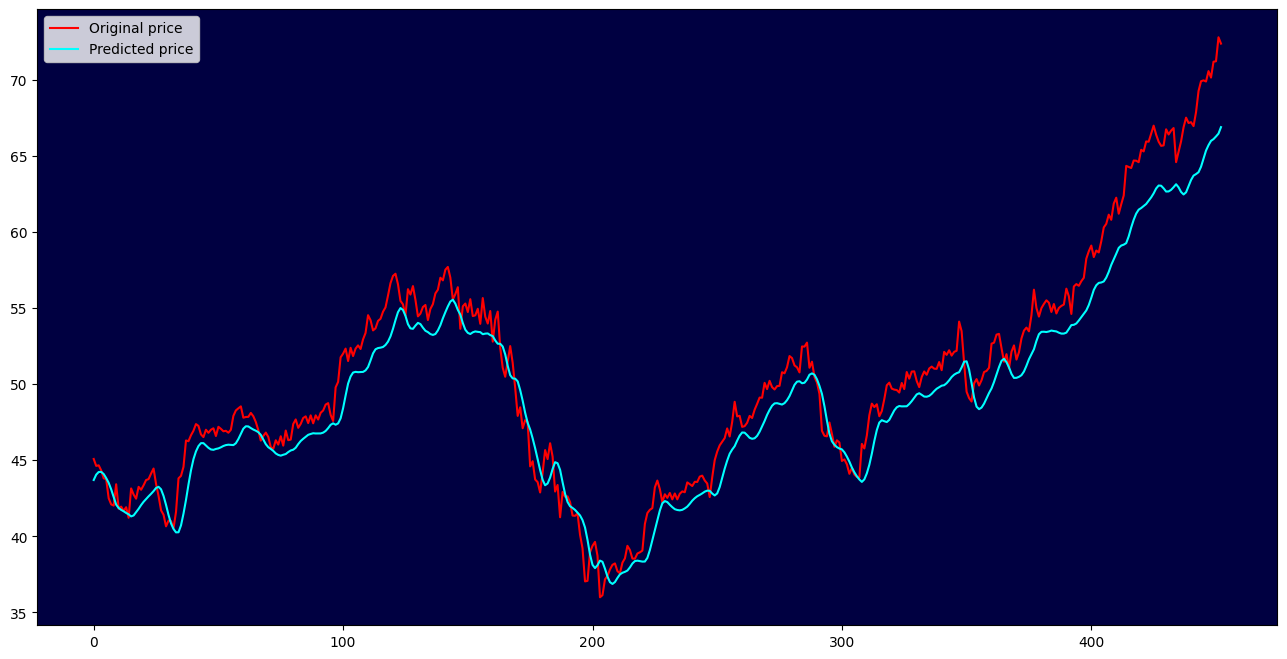

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(16,8))
ax.set_facecolor('#000041')
ax.plot(y_test_scaled, color='red', label='Original price')
plt.plot(predictions, color='cyan', label='Predicted price')
plt.legend()